In [37]:
# Code for analyzing and plotting simulation profiles (run this cell first)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import os
import math

cm = plt.get_cmap("Accent")
cm = cm.reversed()
NUM_COLORS = 2
font = {"family": "sans-serif", "weight": "normal", "size": 7}
matplotlib.rc("font", **font)
figure_width = 4
figure_height_scalar = 1.5
subplot_wspace = 10
subplot_hspace_divider = 2.8
legend_anchor = (0.5, 1.38)
legend_font_size = 7
axis_tick_size = 9
xlabel_font_size = 9
bar_width = 0.3



def plot_h(df):
    for index, row in df.iterrows():
        for col in df.columns:
            if not col.startswith("T_"):
                row = row.drop([col])

        T_rows = [row.split("_")[1] for row in df.columns if row.startswith("T_")]
        T_rows = list(set(T_rows))
        Tlen = T_rows.__len__()
        fig, axs = plt.subplots(Tlen, 1, figsize=(figure_width, Tlen * figure_height_scalar))
        for id, T_row in enumerate(T_rows):
            all_T_row_cols = [row for row in df.columns if row.startswith("T_" + T_row)]
            ndf = df[all_T_row_cols]  # only first row
            ndf = ndf[ndf.columns].sort_values(by=0, axis=1, ascending=True)
            ndf = ndf.iloc[index]
            ndf = ndf.rename(T_row)
            ndf = ndf.to_frame().T
            ax = axs[id]
            pd.DataFrame(ndf).plot(
                kind="barh", stacked=True, ax=ax, colormap=cm, width=bar_width
            )
            ax.set_prop_cycle(color=[cm(5 + 1.0 * i) for i in range(NUM_COLORS)])
            legends = [
                i.replace("T_", "").replace(T_row, "S") for i in list(ndf.columns)
            ]
            a = ndf.sum(axis=1)
            total_cycles = a.values[0]
            ax.legend(
                legends,
                loc="upper left",
                bbox_to_anchor=legend_anchor,
                prop={"size": legend_font_size},
                ncol=int(math.sqrt(len(legends))),
                # ncol=1,

            )
            ax.set_xlabel(f"{T_row} | Total Clock Cycles: {total_cycles}")
            ax.set_xlabel(ax.get_xlabel(), fontweight="normal" , fontsize=xlabel_font_size)
            ax.set_yticklabels("")
            ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: "{:,.0f}K".format(x/1000)))
            ax.tick_params(axis='both', which='major', labelsize=axis_tick_size)

        plt.subplots_adjust(wspace=subplot_wspace, hspace=Tlen / subplot_hspace_divider)
        plt.show()
        break


def single_profile(filename):
    """
    Reads a CSV file into a pandas DataFrame and plots its contents using the plot_h function.

    Args:
        filename (str): Path to the CSV file to be processed.

    The function prints the filename being processed and generates a plot for the data.
    """
    df = pd.read_csv(filename, sep=",", header=0)
    print("Processing file:", filename)
    plot_h(df)



def multi_profile(folder, show_all=False, show_x=3):
    """
    Processes and plots multiple profile CSV files from a specified folder.

    Args:
        folder (str): Path to the folder containing profile CSV files.
        show_all (bool, optional): If True, plot all profiles in the folder. If False, plot up to `show_x` profiles. Default is False.
        show_x (int, optional): Number of profiles to plot if `show_all` is False. Default is 3.

    The function sorts the files by creation time (most recent first), reads each CSV file,
    and generates a plot using the plot_h function. Stops after `show_x` files unless `show_all` is True.
    """
    # profs = sorted(os.listdir(folder), key=lambda x: os.path.getctime(folder + x))
    profs = [f for f in os.listdir(folder) if f.endswith('.csv')]
    # Sort by year, month, day, hour, min, second extracted from the filename
    def extract_datetime_key(x):
        # Example: vm_2025-2-27-13-0-24.csv
        parts = x.rstrip('.csv').split('_')[-1].split('-')
        # Pad month, day, hour, min, sec to 2 digits for correct sorting
        parts = [parts[0]] + [p.zfill(2) for p in parts[1:]]
        # Join as a single sortable string
        return ''.join(parts)
    profs.sort(key=extract_datetime_key)
    profs.reverse()
    for prof in profs:
        filename = folder + prof
        single_profile(filename)
        show_x -= 1
        if show_x == 0 and not show_all:
            break


Processing file: ../../tensorflow/.data/VM_5_2025-5-20-23-36-0.csv


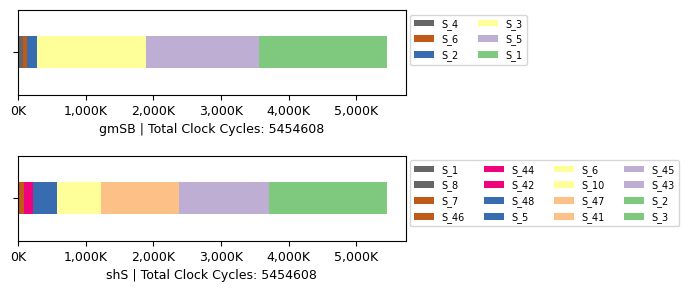

In [38]:
# Adjust the following parameters as needed to customize the plot appearance
figure_width = 5
figure_height_scalar = 1.5
subplot_wspace = 10
subplot_hspace_divider = 2.8
legend_anchor = (1, 1)
legend_font_size = 7
axis_tick_size = 9
xlabel_font_size = 9
bar_width = 0.3



# Use multi_profile function to process and plot profiles within the specified folder
profile_folder = "../../tensorflow/.data/vm_profs/"
# multi_profile(profile_folder, show_all=False, show_x=3) # Uncomment to process all profiles in the folder

# Use single_profile function to process and plot a single profile
single_profile("../../tensorflow/.data/VM_5_2025-5-20-23-36-0.csv")  # file path to a profile CSV file
